# (전국) 코로나 확진자수 시각화

## 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', rc = {'figure.figsize':(16,8)})
matplotlib.rcParams['font.family']='Malgun Gothic'

In [2]:
# KDX 한국데이터 거래소
# 코로나바이러스감염증-19(COVID-19) 현황 누적 데이터 (2021.08.06)
data = pd.read_csv("../data/Covid19SidoInfState.csv")
co_inc= data[['stdDay','gubun','incDec']]
co_inc = co_inc[co_inc['gubun']=='합계']
unique = co_inc.drop_duplicates()
unique

,stdDay,gubun,incDec
0,2020년 3월 1일 16시,합계,586.0
19,2020년 3월 4일 00시,합계,516.0
37,2020년 3월 5일 00시,합계,438.0
55,2020년 3월 6일 00시,합계,518.0
73,2020년 3월 7일 00시,합계,483.0
...,...,...,...
10077,2021년 07월 22일 00시,합계,1842.0
10115,2021년 07월 23일 00시,합계,1630.0
10134,2021년 07월 24일 00시,합계,1629.0
10153,2021년 07월 25일 00시,합계,1487.0


In [3]:
years=[]
for days in unique['stdDay']:
    years.append(days.split()[0])

In [4]:
unique['year']=years
unique

<ipython-input-4-06b4b24fba8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['year']=years


,stdDay,gubun,incDec,year
0,2020년 3월 1일 16시,합계,586.0,2020년
19,2020년 3월 4일 00시,합계,516.0,2020년
37,2020년 3월 5일 00시,합계,438.0,2020년
55,2020년 3월 6일 00시,합계,518.0,2020년
73,2020년 3월 7일 00시,합계,483.0,2020년
...,...,...,...,...
10077,2021년 07월 22일 00시,합계,1842.0,2021년
10115,2021년 07월 23일 00시,합계,1630.0,2021년
10134,2021년 07월 24일 00시,합계,1629.0,2021년
10153,2021년 07월 25일 00시,합계,1487.0,2021년


## 일간 확진자수 시각화 (2020년)

In [5]:
unique = unique[unique['year']=='2020년']

In [6]:
x_ticks=np.arange(3,13)
x_ticks

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

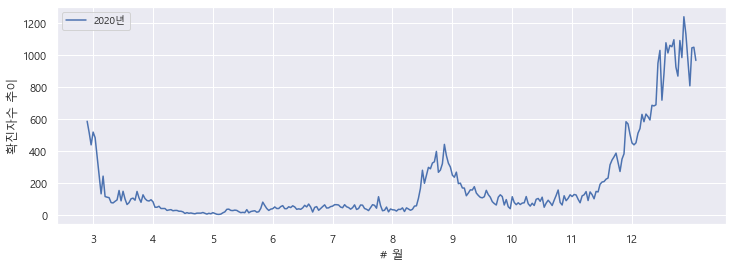

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(unique['stdDay'],unique['incDec'], label="2020년")
#plt.xticks(np.arange(0, 2, 0.2), labels=['Jan', '', 'Feb', '', 'Mar', '', 'May', '', 'June', '', 'July'])
plt.xticks(np.arange(3,303,30),x_ticks)
plt.legend(fontsize=10)
plt.xlabel("# 월")
plt.ylabel("확진자수 추이")
plt.show()

### 관광지별 plot 한 것과 비교 결과 (3,9,11 확진자수 증가의 영향 파악)

결과:테디베어 박물관. 3월, 12월 떨어지는 모습.  
오토캠핑장 8월 하락, 청암산도 잘되다 하반기 하락, 은파호수 공원 8월 하락 

# 실내/ 실외 관광지와 비교

## 월 데이터 추출하여 월별 코로나 확진자수 시각화

In [8]:
month=[]
for days in unique['stdDay']:
    x = days.split()[1]
    if x == '3월':
        x='03월'
    elif x == '4월':
        x='04월'
    elif x == '5월':
        x='05월'
    elif x == '6월':
        x='06월'
    month.append(x)

In [9]:
unique['month']=month

<ipython-input-9-367c5b931b6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique['month']=month


In [10]:
table = pd.pivot_table(unique, values='incDec', index=['month'], aggfunc=np.sum)
table

,incDec
month,
03월,5560.0
04월,1057.0
05월,703.0
06월,1334.0
07월,1509.0
08월,5642.0
09월,3865.0
10월,2713.0
11월,7769.0


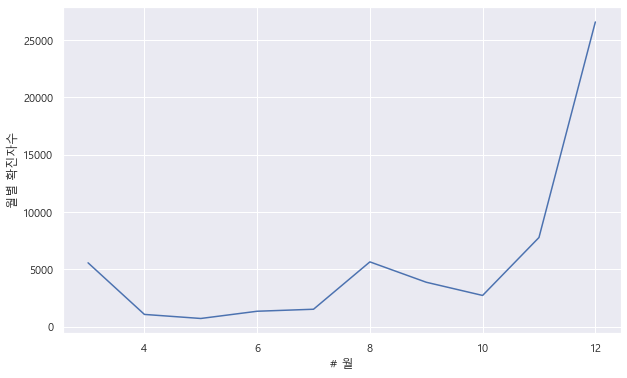

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x_ticks,table['incDec'], label="2020년")
#plt.xticks(np.arange(0, 2, 0.2), labels=['Jan', '', 'Feb', '', 'Mar', '', 'May', '', 'June', '', 'July'])
plt.xlabel("# 월")
plt.ylabel("월별 확진자수")
plt.show()

In [12]:
#같은 디렉토리의 "군산 관광지별 입장객 통계" 파일을 먼저 실행해야 생성되는 파일!!
attr = pd.read_csv('../data/Gunsan_Attractions_in_out2020.csv',index_col='실내외구분')## index_col 유용!
X=attr.T
비율 = X['실내']/X['실외']
X['실내/실외']=비율
X

실내외구분,복합,실내,실외,실내/실외
01월,52777,96308,237046,0.406284
02월,16910,14999,205939,0.072832
03월,20327,9888,245191,0.040328
04월,27684,14849,407785,0.036414
05월,42132,42251,373749,0.113046
06월,25440,48172,352003,0.136851
07월,25622,34504,325418,0.106030
08월,40910,66533,411209,0.161799
09월,15964,6690,400500,0.016704
10월,40179,31549,418870,0.075319


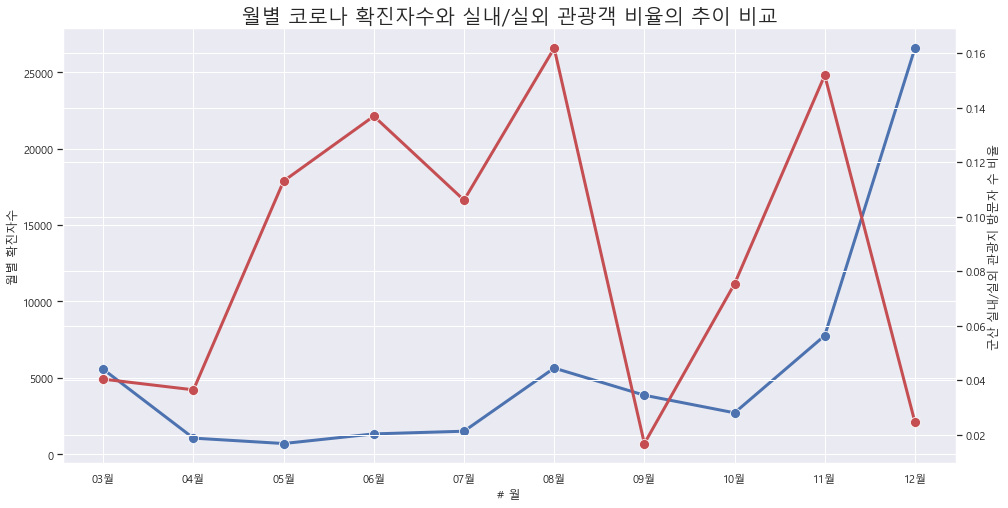

In [13]:
fig, ax = plt.subplots()
p1 = sns.lineplot(data=table['incDec'], linestyle='-',marker='o',linewidth = 3,markersize=10, ax=ax)
p1.set_xlabel("# 월")
p1.set_ylabel("월별 확진자수")
ax2 = ax.twinx()
p2 = sns.lineplot(data=X['실내/실외'][2:],linestyle='-',marker='o',linewidth = 3,markersize=10, ax=ax2, color='r')
p2.set_ylabel("군산 실내/실외 관광지 방문자 수 비율")
#plt.title("월별 코로나 확진자수와 실내/실외 관광객 비율의 추이 비교")
p2.set_title("월별 코로나 확진자수와 실내/실외 관광객 비율의 추이 비교", fontsize = 20)
plt.show()

#### 결론: 확진자수가 증가세, 감소세로 전환되고 다음 달에 실외 대비 실내 관광객 수가 대폭 감소/ 증가 하는 경향을 보인다.
* 확진자수가 증가하면 일정 시간 후, 실내 관광객 수가 증가한다.